In [67]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Load widths data from training
width_arr_dict = {}
for net_size in [10, 20, 40, 80, 160]:
    width_arr_dict[net_size] = np.load('drive/MyDrive/deep-learning/final_project/width_data_uniform_'+str(net_size)+'.npy')[:, 0, :]
width_arr_gaussian_dict = {}
for net_size in [10, 20, 40, 80, 160]:
    width_arr_gaussian_dict[net_size] = np.load('drive/MyDrive/deep-learning/final_project/width_data_'+str(net_size)+'.npy')[:, 0, :]

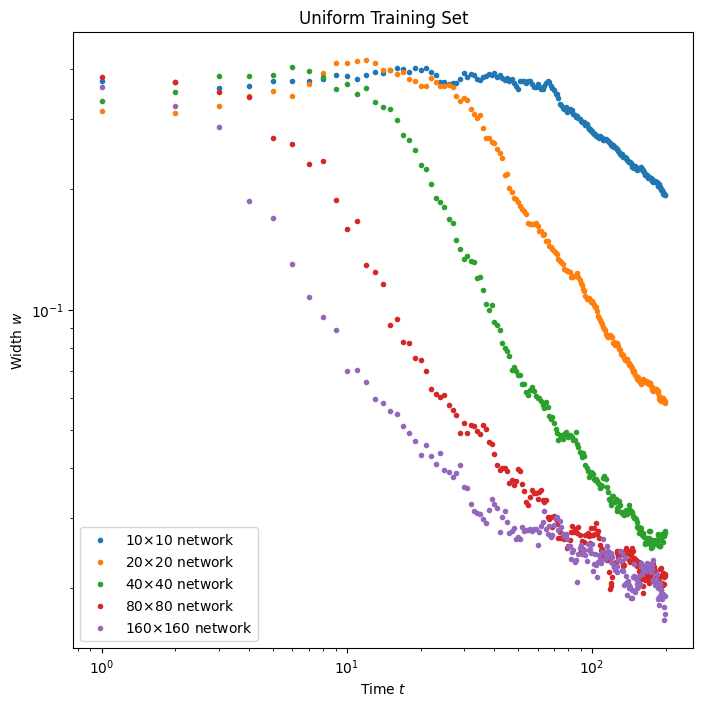

In [69]:
plt.figure(figsize=(8, 8))
for net_size in [10, 20, 40, 80, 160]:
    plt.loglog(np.mean(width_arr_dict[net_size], axis=0), '.', label=str(net_size)+r'$\times$'+str(net_size)+' network')
plt.legend(loc='best')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Width $w$')
plt.title('Uniform Training Set')
plt.savefig('drive/MyDrive/deep-learning/final_project/uniform_set_scaling.png', dpi=300)
plt.show()

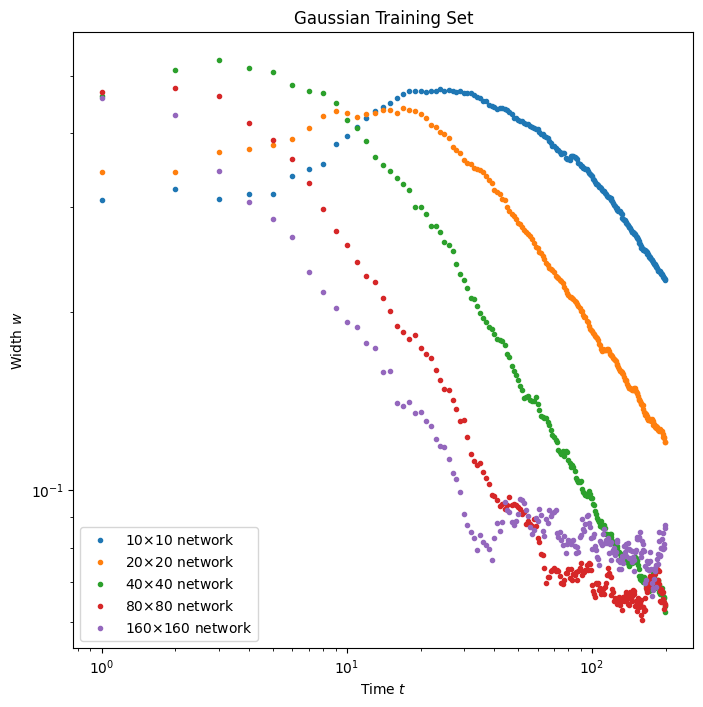

In [70]:
plt.figure(figsize=(8, 8))
for net_size in [10, 20, 40, 80, 160]:
    plt.loglog(np.mean(width_arr_gaussian_dict[net_size], axis=0), '.', label=str(net_size)+r'$\times$'+str(net_size)+' network')
plt.legend(loc='best')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Width $w$')
plt.title('Gaussian Training Set')
plt.savefig('drive/MyDrive/deep-learning/final_project/gaussian_set_scaling.png', dpi=300)
plt.show()

In [135]:
# Linear regression to retrieve the growth expoenent \beta
width_arr_mean = np.mean(width_arr_dict[160], axis=0)

In [139]:
width_arr_mean[2:8]

array([0.32342753, 0.28642264, 0.1871385 , 0.16964132, 0.13015932,
       0.10728164])

In [140]:
Y = np.log(width_arr_mean[2:8])
X = np.stack((np.ones(len(Y)), np.log(np.arange(2, 2+len(Y))))).T
coeffs = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T).dot(Y)

In [141]:
# \beta for 160 * 160 network
# coeffs

array([-0.39733507, -0.9051237 ])

In [134]:
# \beta for 80 * 80 network
# coeffs

array([-0.06554128, -0.75508468])

In [124]:
# \beta for 40 * 40 network
# coeffs

array([ 1.11885446, -0.93233367])

In [118]:
# \beta for 20 * 20 network
# coeffs

array([ 1.96586729, -0.91996562])

In [103]:
# \beta for 10 * 10 network
# coeffs

array([ 1.15243444, -0.52444027])

In [143]:
#array([ 1.15243444, -0.52444027])
#array([ 1.96586729, -0.91996562])
#array([ 1.11885446, -0.93233367])
#array([-0.06554128, -0.75508468])
#array([-0.39733507, -0.9051237 ])